In [58]:
import matplotlib.pyplot as plt
import numpy as np
import time

time taken to execute (seconds):  0.18941211700439453


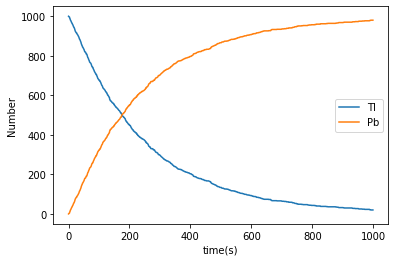

In [60]:
#Problem 1: 10.4

#This is Example 10.1
start = time.time()

#constants
NTl = 1000 #No. of thallium atoms
NPb = 0    #No. of lead atoms
tau = 3.053*60 #half-life
h = 1 #timestep
p = 1-2**(-h/tau) #probability of decay in 1 timestep
tmax = 1000 #total time

#Lists of number of atoms after subsequent steps
tsteps = np.arange(0,tmax,h)
Tl = []
Pb = []

for t in tsteps:
    Tl.append(NTl)
    Pb.append(NPb)
    
    decay = 0 
    for i in range(NTl):
        if np.random.random() < p:
            decay += 1 
    
    NTl -= decay
    NPb += decay
    
plt.plot(tsteps, Tl, label='Tl')
plt.plot(tsteps, Pb, label='Pb')
plt.xlabel('time(s)')
plt.ylabel('Number')
plt.legend()

end = time.time()
print('time taken to execute (seconds): ', end - start)

time taken to execute (seconds):  0.07956290245056152


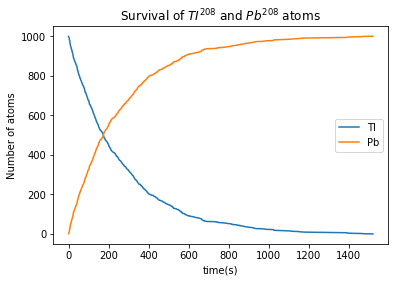

In [61]:
#This is the problem using the transformation method
start = time.time()

#constants
NTl = 1000 #No. of thallium atoms
NPb = 0    #No. of lead atoms
tau = 3.053*60 #half-life
mu = np.log(2)/tau #normalization factor

z = np.random.rand(NTl) #a random number distributed uniformly between 0 and 1

x = -1/mu*np.log(1-z) 
x = np.sort(x) #exponentially distributed values
decayed = np.arange(1,NTl+1)

survived = NTl-decayed 
survived1 = NPb + decayed

plt.plot(x,survived, label='Tl')
plt.plot(x,survived1, label='Pb')
plt.xlabel('time(s)')
plt.ylabel('Number of atoms')
plt.legend()
plt.title('Survival of $TI^{208}$ and $Pb^{208}$ atoms')

end = time.time()
print('time taken to execute (seconds): ', end - start)

In [90]:
#Problem 2: 10.7
N = 10000000
dim = 10

def f(x):
    r2 = zeros(x.shape[1],float)
    for xi in x:
        r2 += xi**2
    return r2<1

#generate a large sample of points (x) in [0,1) 
x = np.random.random((dim,N))*2 - 1

#fx is the value of the fuction evaluated at x 
fx = f(x)

I = 2**dim/N * sum(fx)

var = sum(fx**2)/N-(sum(fx)/N)**2 
sigma = 2**dim*np.sqrt(var/N)
print('Volume of ten-dimensional sphere: ', I)
print('Error: ', sigma)

Volume of ten-dimensional sphere:  2.5552896
Error:  0.01615576381809332


In [141]:
#Problem 3: 5.2

def simpson( f, a, b, N ):
    oddSum = 0
    for k in range(1, N, 2):
        oddSum += f(a + k*h)

    evenSum = 0
    for k in range(2, N, 2):
        evenSum += f(a + k*h)

    I = 1/3*h*(f(a) + f(b) + 4*oddSum + 2*evenSum)
    return I

In [142]:
#part a
a = 0
b = 2
N = 10 # number of slices
exact=4.4

def f(x):
    return x**4 - 2*x + 1

I=simpson( f, a, b, N )

print( 'Integral: ', I)
print('Error: ', np.abs(I-exact)/exact )

Integral:  0.027626667200042664
Error:  0.9937212119999903


In [143]:
#part c
a = 0
b = 2
N = 100 # number of slices
exact=4.4

def f(x):
    return x**4 - 2*x + 1

I=simpson( f, a, b, N )

print( 'Integral: ', I)
print('Error: ', np.abs(I-exact)/exact )

Integral:  0.16832960000042665
Error:  0.9617432727271756


In [144]:
#part c
a = 0
b = 2
N = 1000 # number of slices
exact=4.4

def f(x):
    return x**4 - 2*x + 1

I=simpson( f, a, b, N )

print( 'Integral: ', I)
print('Error: ', np.abs(I-exact)/exact )

Integral:  4.400000000004267
Error:  9.697293473271367e-13


Slope of log-log plot: -0.1555883459746644


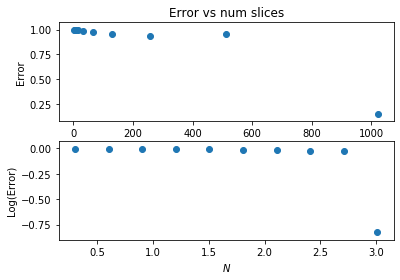

In [145]:
Ns = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
err_list = []

for N in Ns:
    I = simpson( f, a, b, N )
    err = (I - exact)/exact
    err_list.append(err)

fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax1.scatter( Ns, np.fabs(err_list) )
ax1.set_ylabel('Error')
ax2 = fig.add_subplot(2,1,2)
ax2.scatter( np.log10(Ns), np.log10(np.fabs(err_list)) )
m,c = np.polyfit(np.log10(Ns), np.log10(np.fabs(err_list)) , 1 )
print('Slope of log-log plot:', m)
ax2.set_xlabel(r"$N$")
ax2.set_ylabel('Log(Error)')
ax1.title.set_text('Error vs num slices')
plt.show()